# Exploratory Data Analysis

---
exports:
  - format: pdf
---

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-dark")

## Loading Dataset

In [3]:
disaster = pd.read_csv("data/global_disaster_response_2018_2024 (1).csv")
disaster.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


## Number of Disasters Over Time

In [4]:
#transforming date to usable temporal format
disaster["date"] = pd.to_datetime(disaster["date"], errors="coerce")
disaster["year"] = disaster["date"].dt.year

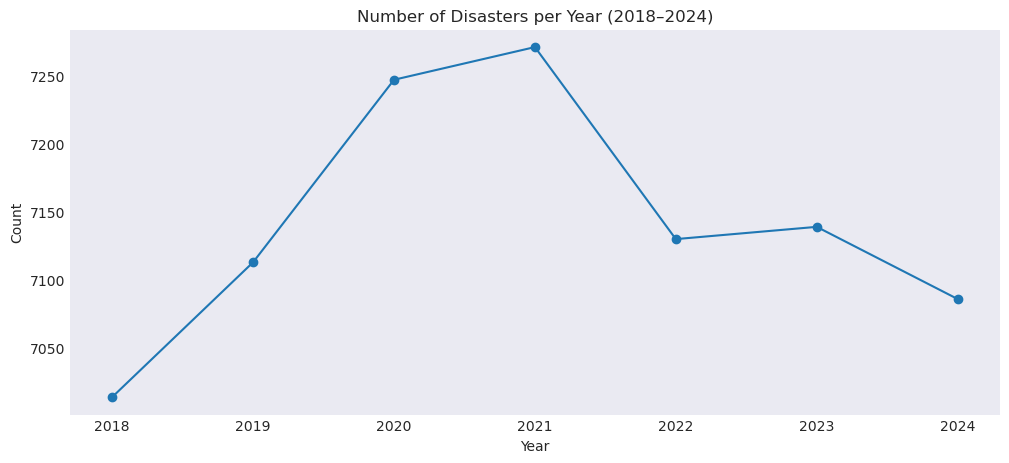

In [5]:
disasters_per_year = disaster.groupby("year").size().sort_index()

fig, ax = plt.subplots(figsize=(12, 5))
disasters_per_year.plot(kind="line", marker="o", ax=ax)

ax.set_title("Number of Disasters per Year (2018–2024)")
ax.set_xlabel("Year")
ax.set_ylabel("Count")

fig.savefig("figures/disasters_per_year.png", dpi=100, bbox_inches="tight")
plt.show()

## Average Severity Over Time

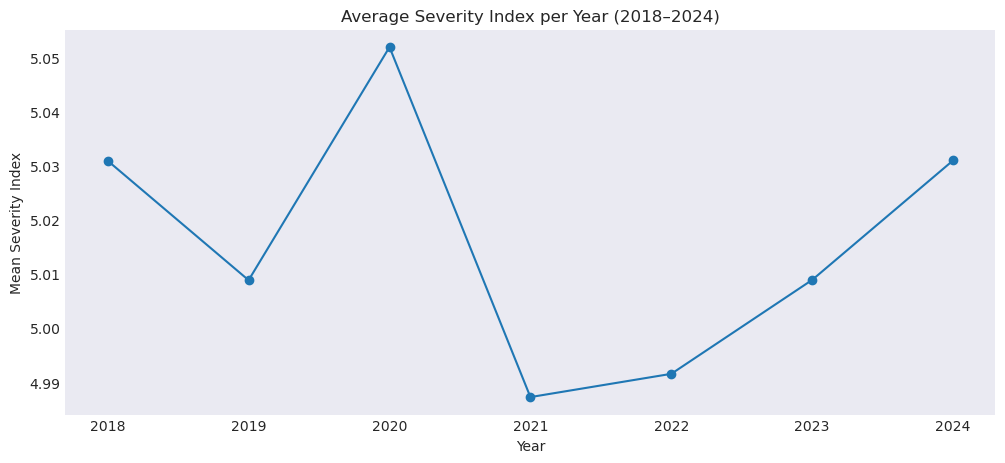

In [7]:
severity_per_year = disaster.groupby("year")["severity_index"].mean().sort_index()

fig, ax = plt.subplots(figsize=(12, 5))
severity_per_year.plot(kind="line", marker="o", ax=ax)

ax.set_title("Average Severity Index per Year (2018–2024)")
ax.set_xlabel("Year")
ax.set_ylabel("Mean Severity Index")

fig.savefig("figures/severity_per_year.png", dpi=100, bbox_inches="tight")
plt.show()

## Average Economic Loss by Disaster Type

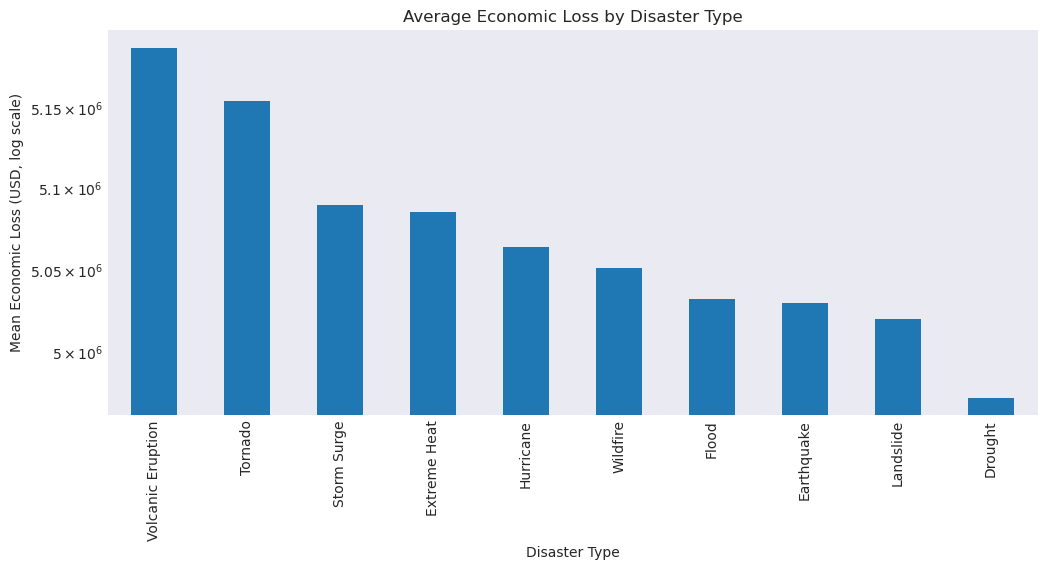

In [8]:
loss_by_type = disaster.groupby("disaster_type")["economic_loss_usd"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
loss_by_type.plot(kind="bar", ax=ax)

ax.set_title("Average Economic Loss by Disaster Type")
ax.set_xlabel("Disaster Type")
ax.set_ylabel("Mean Economic Loss (USD, log scale)")
ax.set_yscale("log")

fig.savefig("figures/avg_economic_loss_by_disaster_type.png", dpi=100, bbox_inches="tight")
plt.show()

## Average Casualties by Disaster Type

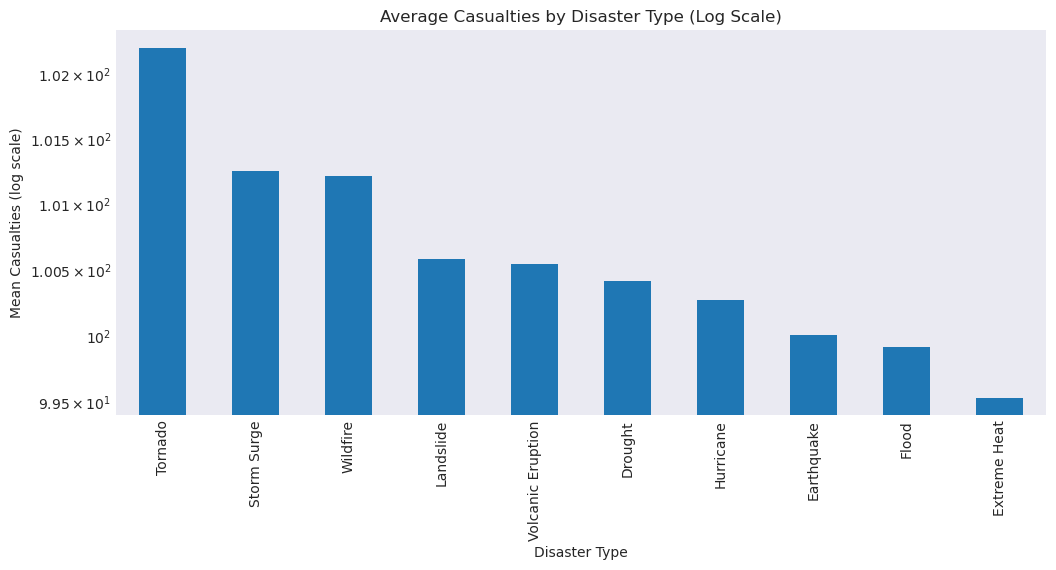

In [9]:
casualties_by_type = disaster.groupby("disaster_type")["casualties"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
casualties_by_type.plot(kind="bar", ax=ax)

ax.set_title("Average Casualties by Disaster Type (Log Scale)")
ax.set_xlabel("Disaster Type")
ax.set_ylabel("Mean Casualties (log scale)")
ax.set_yscale("log")

fig.savefig("figures/avg_casualties_by_disaster_type.png", dpi=100, bbox_inches="tight")
plt.show()

## Average Response Time by Disaster Type

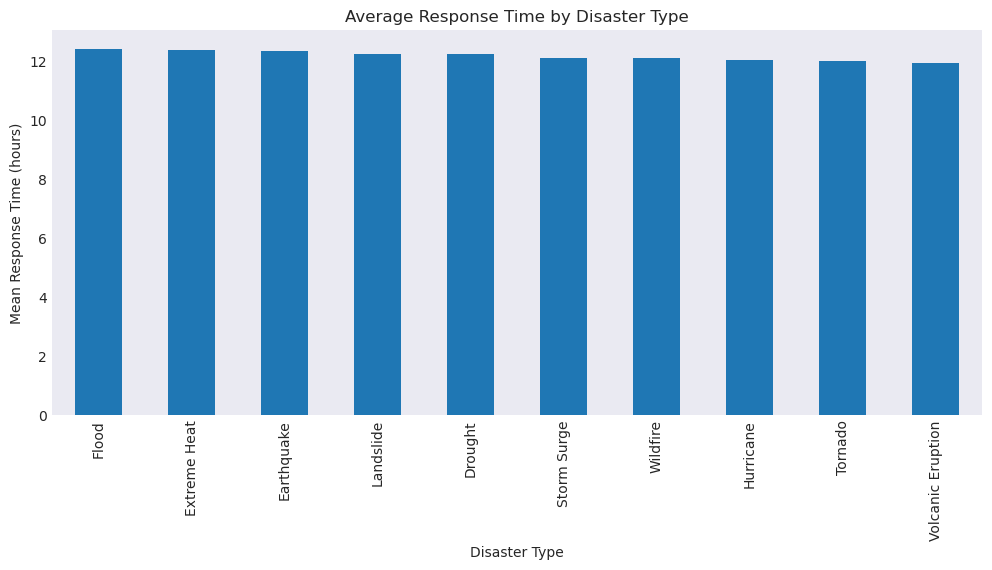

In [10]:
response_time_by_type = disaster.groupby("disaster_type")["response_time_hours"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
response_time_by_type.plot(kind="bar", ax=ax)

ax.set_title("Average Response Time by Disaster Type")
ax.set_xlabel("Disaster Type")
ax.set_ylabel("Mean Response Time (hours)")

fig.savefig("figures/avg_response_time_by_disaster_type.png", dpi=100, bbox_inches="tight")
plt.show()

## Average Recovery Days by Disaster Type

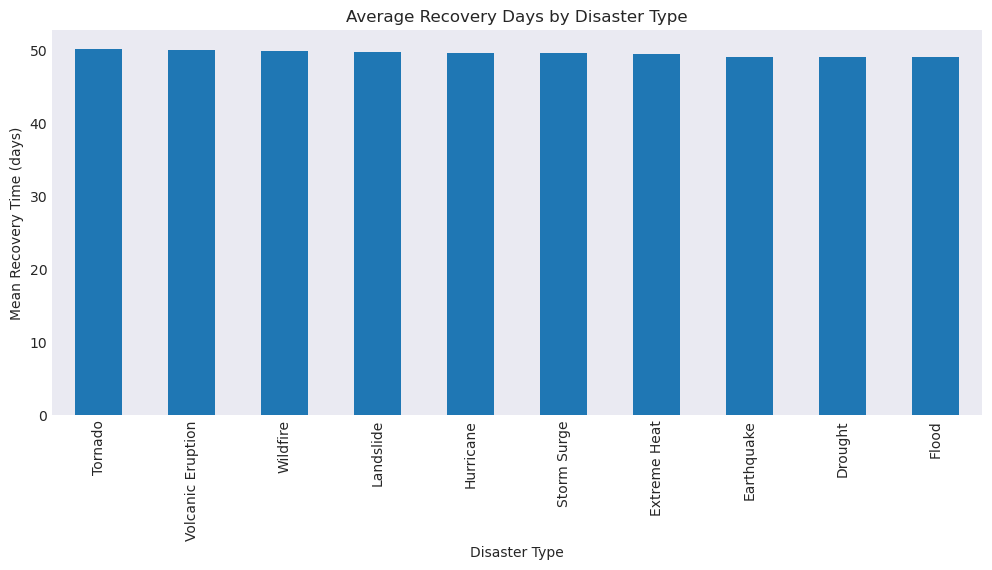

In [11]:
recovery_days_by_type = disaster.groupby("disaster_type")["recovery_days"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
recovery_days_by_type.plot(kind="bar", ax=ax)

ax.set_title("Average Recovery Days by Disaster Type")
ax.set_xlabel("Disaster Type")
ax.set_ylabel("Mean Recovery Time (days)")

fig.savefig("figures/avg_recovery_days_by_disaster_type.png", dpi=100, bbox_inches="tight")
plt.show()